<a href="https://colab.research.google.com/github/KhuzaimaHassan/Data-Mining/blob/main/Lab11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB-11


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from imblearn.over_sampling import SMOTE

In [ ]:

# 2. Load dataset
df = pd.read_csv("creditcard_fraud.csv")

# 3. Exploratory Data Analysis
print("\nDataset Head:")
print(df.head())
print("\nDataset Info:")
print(df.info())
print("\nStatistical Summary:")
print(df.describe())




Dataset Head:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      


Missing values:
Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64


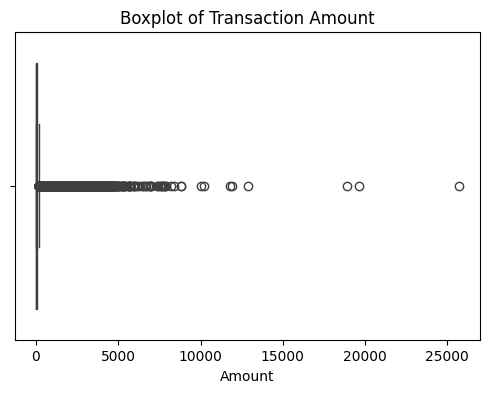


Class Distribution:
Class
0    284315
1       492
Name: count, dtype: int64


In [ ]:
# 4. Check for missing values and outliers
print("\nMissing values:")
print(df.isnull().sum())

# Boxplot to check for outliers in 'Amount'
plt.figure(figsize=(6,4))
sns.boxplot(x=df['Amount'])
plt.title('Boxplot of Transaction Amount')
plt.show()
# 5. Class distribution
print("\nClass Distribution:")
print(df['Class'].value_counts())



In [ ]:
# 6. Feature Scaling
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df[['Amount']])

# 7. Features and Labels
X = df.drop('Class', axis=1)
y = df['Class']

# 8. Train-Test Split (70:30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# 9. Model Training & Evaluation
models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(probability=True),
    "Naive Bayes": GaussianNB()
}

In [ ]:
print("\nPrecision Scores Before SMOTE:")
precision_scores = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precision_scores[name] = precision
    print(f"{name}: {precision:.4f}")

best_model_before = max(precision_scores, key=precision_scores.get)
print(f"\nBest model before SMOTE: {best_model_before} with precision {precision_scores[best_model_before]:.4f}")





Precision Scores Before SMOTE:
Decision Tree: 0.7786
Random Forest: 0.9573
KNN: 1.0000
SVC: 0.0000
Naive Bayes: 0.1460

Best model before SMOTE: KNN with precision 1.0000


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# 10. Apply SMOTE
sm = SMOTE(random_state=42)
X_train_sm, y_train_sm = sm.fit_resample(X_train, y_train)



In [ ]:
print("\nClass Distribution:")
print(df['Class'].value_counts())

In [ ]:
# 11. Model Training & Evaluation after SMOTE
print("\nPrecision Scores After SMOTE:")
precision_scores_smote = {}
for name, model in models.items():
    model.fit(X_train_sm, y_train_sm)
    y_pred = model.predict(X_test)
    precision = precision_score(y_test, y_pred)
    precision_scores_smote[name] = precision
    print(f"{name}: {precision:.4f}")

best_model_after = max(precision_scores_smote, key=precision_scores_smote.get)
print(f"\nBest model after SMOTE: {best_model_after} with precision {precision_scores_smote[best_model_after]:.4f}")


Precision Scores After SMOTE:
Decision Tree: 0.3956
Random Forest: 0.8369
KNN: 0.0621


# EXTRA WORK

In [ ]:
X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)


In [ ]:
def train_and_evaluate(X_train_res, y_train_res):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_train_res, y_train_res)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))


In [ ]:
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)

print("Random Over-Sampling:")
train_and_evaluate(X_ros, y_ros)


Random Over-Sampling:
[[85291     4]
 [   38   110]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.74      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.947368552384966


In [ ]:
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)

print("Random Under-Sampling:")
train_and_evaluate(X_rus, y_rus)


Random Under-Sampling:
[[83647  1648]
 [   18   130]]
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

ROC AUC Score: 0.972757979856872


In [ ]:
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)

print("SMOTE:")
train_and_evaluate(X_smote, y_smote)


SMOTE:
[[85279    16]
 [   30   118]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.88      0.80      0.84       148

    accuracy                           1.00     85443
   macro avg       0.94      0.90      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.9493089563565559


In [ ]:
def plot_roc(model, X_test, y_test):
    y_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    auc_score = roc_auc_score(y_test, y_prob)
    plt.plot(fpr, tpr, label=f"AUC = {auc_score:.2f}")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curve")
    plt.legend()
    plt.grid(True)
    plt.show()


Class Distribution:
 Class
0    284315
1       492
Name: count, dtype: int64
===== Random Over-Sampling =====
Confusion Matrix:
 [[85291     4]
 [   38   110]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85295
           1       0.96      0.74      0.84       148

    accuracy                           1.00     85443
   macro avg       0.98      0.87      0.92     85443
weighted avg       1.00      1.00      1.00     85443

ROC AUC Score: 0.947368552384966
===== Random Under-Sampling =====
Confusion Matrix:
 [[83647  1648]
 [   18   130]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     85295
           1       0.07      0.88      0.13       148

    accuracy                           0.98     85443
   macro avg       0.54      0.93      0.56     85443
weighted avg       1.00      0.98      0.99     85443

ROC AUC Score: 0.9727

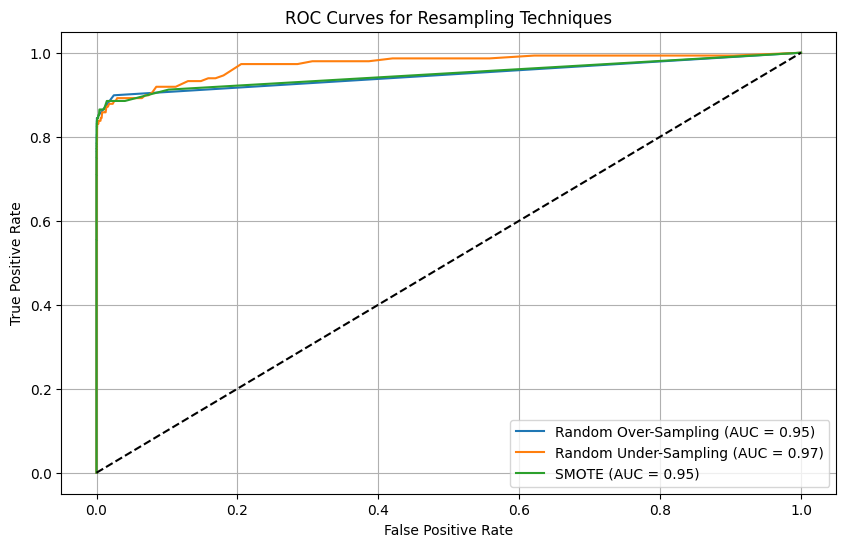

In [ ]:
# 1. Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler

# 2. Load dataset
df = pd.read_csv("creditcard_fraud.csv")

# 3. Basic Info
print("Class Distribution:\n", df['Class'].value_counts())

# 4. Features and Labels
X = df.drop('Class', axis=1)
y = df['Class']

# 5. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, stratify=y, random_state=42)

# 6. Helper function: Train & Evaluate
def train_and_evaluate(X_resampled, y_resampled, method_name):
    model = RandomForestClassifier(random_state=42)
    model.fit(X_resampled, y_resampled)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print(f"===== {method_name} =====")
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

    return y_prob, model

# 7. Random Over-Sampling
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X_train, y_train)
y_prob_ros, model_ros = train_and_evaluate(X_ros, y_ros, "Random Over-Sampling")

# 8. Random Under-Sampling
rus = RandomUnderSampler(random_state=42)
X_rus, y_rus = rus.fit_resample(X_train, y_train)
y_prob_rus, model_rus = train_and_evaluate(X_rus, y_rus, "Random Under-Sampling")

# 9. SMOTE
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X_train, y_train)
y_prob_smote, model_smote = train_and_evaluate(X_smote, y_smote, "SMOTE")

# 10. Plot ROC Curves
def plot_roc_curves(y_test, y_probs_dict):
    plt.figure(figsize=(10, 6))
    for method, y_prob in y_probs_dict.items():
        fpr, tpr, _ = roc_curve(y_test, y_prob)
        auc = roc_auc_score(y_test, y_prob)
        plt.plot(fpr, tpr, label=f"{method} (AUC = {auc:.2f})")

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC Curves for Resampling Techniques")
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

plot_roc_curves(y_test, {
    "Random Over-Sampling": y_prob_ros,
    "Random Under-Sampling": y_prob_rus,
    "SMOTE": y_prob_smote
})
